### I. Importing Libraries & Data
### II. Addressing PII data 
### III. Data Consistency checks on both data frames
### IV. Merging df_ords_prods_customers with df_departments

### A. Answering the key questions from Instacart from the achievement brief
#### 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) to schedule ads at times when there are fewer orders.
#### 2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.
#### 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts
#### 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

### B. Answering the task 4.10
#### 1. The Instacart officers are interested in comparing customer behavior in different geographic areas.
##### 1a. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customer's data set.
##### 1b. Determine whether there’s a difference in spending habits between the different U.S. regions. 
#### 2. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.
##### 2a. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
##### 2b. Make sure you export this sample.
#### 3. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
##### 3a. creating a new column for age profiling 
##### 3b. creating a new column for income profiling 
##### 3c. crossing the age profiling with the department column 
##### 3d. crossing the region with the department column to compare the behavior of the customers by region
##### 3e. creating a profile for families with married customers with small or big families depending on the number of dependents
#### 4. Exporting df_complete

# I. Importing Libraries & Data

In [1]:
#importing libraries and data
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#shortcut for importing data files
path = r'C:\\Users\\anaar\\OneDrive\\Documents\\03-2024-Instacart Basket Analysis'

In [3]:
#importing the latest version of the data from 4.9 with customers columns
df_ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_combined_4.9_part1.pkl'))

# II. Adressing PII data 

To comply with the GDPR the columns 'first_name', 'last_name', and 'gender' will no be longer considered in this analysis. 

In [4]:
#Droping columns to comply with GDPR
columns_to_exclude = ['first_name', 'last_name', 'gender']
df_ords_prods_customers = df_ords_prods_customers.drop(columns=columns_to_exclude)

In [5]:
#Setting the display option to show all columns
pd.set_option('display.max_columns', None)

In [6]:
#Checking for output of df_ords_prods_customers
df_ords_prods_customers.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,order_frequency,frequency_flag,state,age,date_joined,n_dependants,fam_status,income,merge_indicator_4.9
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Least busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Least busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Busiest days,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,2,1,both,Soda,77,7,9.0,both,Regularly busy,Busiest days,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,4,1,both,Soda,77,7,9.0,both,Regularly busy,Busiest days,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,both,Soda,77,7,9.0,both,Least busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both


In [7]:
#importing the department_id df
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)

In [8]:
#Checking for output of df_ords_prods_customers
df_departments.head(21)

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


# III. Data Consistency checks on both data frames

In [9]:
#Data quality check for 'df_ords_prods_customers'
df_ords_prods_customers.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_spend,order_frequency,age,date_joined,n_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,32404859,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,2018-08-16 15:37:38.003037440,1.501896e+00,9.943773e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,2017-01-01 00:00:00,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,2017-10-22 00:00:00,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2018-08-16 00:00:00,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,2019-06-09 00:00:00,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,2020-04-01 00:00:00,3.000000e+00,5.939010e+05
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,NaN,1.118865e+00,4.305727e+04


Based on the minimum and maximum values for each column the data seems to fall within the expected ranges. 
The columns order_id, user_id, order_number, product_id, aisle_id, and department_id columns have minimum values greater than zero, which is consistent with typical indexing in Python. 
The order_hour_of_day column ranges from 0 to 23, indicating the hours of the day.

In [10]:
#Checking for data type of 'df_ords_prods_customers'
print(df_ords_prods_customers.dtypes)

order_id                           int64
user_id                            int64
order_number                       int64
orders_day_of_week                 int64
order_hour_of_day                  int64
days_since_prior_order           float64
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
_merge                          category
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
merge_indicator                 category
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
avg_spend                        float64
spender_flag                      object
order_frequency                  float64
frequency_flag                    object
state           

The mix-data check was conducted in previous stages and there are no mix-type columns. 

In [11]:
#Checking for missing data
df_ords_prods_customers.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
orders_day_of_week              0
order_hour_of_day               0
days_since_prior_order    2076096
product_id                      0
add_to_cart_order               0
reordered                       0
_merge                          0
product_name                    0
aisle_id                        0
department_id                   0
prices                       5127
merge_indicator                 0
busiest_day                     0
busiest_days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
avg_spend                       0
spender_flag                    0
order_frequency                 5
frequency_flag                  0
state                           0
age                             0
date_joined                     0
n_dependants                    0
fam_status                      0
income        

In [12]:
#Checking the NAN in 'days_since_prior_order'
df_nan_days_since_prior_order = df_ords_prods_customers [df_ords_prods_customers ['days_since_prior_order'].isnull () == True]

In [13]:
#displaying df_nan_days_since_prior_order
df_nan_days_since_prior_order

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,order_frequency,frequency_flag,state,age,date_joined,n_dependants,fam_status,income,merge_indicator_4.9
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
10,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
11,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
21,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
23,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404816,3320476,38979,1,1,11,NaN,13128,1,0,both,Purified Alkalkine Water with Minerals pH10,115,7,8.9,both,Regularly busy,Busiest days,"Most orders in hours: 9,10,11,12,13,14,15,16",3,New customer,8.900000,Low spender,7.0,Frequent customer,Indiana,57,2019-12-15,1,married,135623,both
32404819,968657,120516,1,2,9,NaN,8566,1,0,both,"Almond Butter, Smooth/Unsalted",88,13,13.6,both,Regularly busy,Regularly busy,"Most orders in hours: 9,10,11,12,13,14,15,16",7,New customer,13.285714,High spender,18.5,Regular customer,Arizona,19,2019-06-14,0,single,76190,both
32404826,1600476,166751,1,5,11,NaN,49001,1,0,both,Melatonin 2.5 Mg Sublingual Orange Tablets,47,11,3.5,both,Regularly busy,Regularly busy,"Most orders in hours: 9,10,11,12,13,14,15,16",3,New customer,3.500000,Low spender,10.0,Frequent customer,Oregon,38,2018-08-17,1,married,41766,both
32404829,259165,106143,1,2,21,NaN,19675,1,0,both,Organic Raspberry Black Tea,94,7,10.7,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",26,Regular customer,10.700000,High spender,7.0,Frequent customer,Hawaii,25,2017-05-26,0,single,53755,both


In [14]:
#Checking the NAN in 'days_since_prior_order'
df_nan_prices = df_ords_prods_customers [df_ords_prods_customers ['prices'].isnull () == True]

In [15]:
#displaying df_nan_prices
df_nan_prices

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,order_frequency,frequency_flag,state,age,date_joined,n_dependants,fam_status,income,merge_indicator_4.9
7805,1435153,1519,26,2,11,6.0,21553,15,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,Regularly busy,Regularly busy,"Most orders in hours: 9,10,11,12,13,14,15,16",47,Loyal customer,50.932895,High spender,6.0,Frequent customer,Rhode Island,68,2020-03-04,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.0,21553,28,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,Regularly busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",47,Loyal customer,50.932895,High spender,6.0,Frequent customer,Rhode Island,68,2020-03-04,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.0,21553,1,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,Regularly busy,Busiest days,"Average orders in hours: 7,8,17,18,19,20,21,22",48,Loyal customer,35.233761,High spender,5.0,Frequent customer,Hawaii,55,2018-11-11,2,married,230074,both
20264,965345,3531,27,2,19,8.0,33664,2,0,both,2 % Reduced Fat Milk,84,16,NaN,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",29,Regular customer,267.469870,High spender,8.0,Frequent customer,Hawaii,80,2019-10-06,2,married,233776,both
20497,2943740,3793,1,2,9,NaN,21553,3,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,Regularly busy,Regularly busy,"Most orders in hours: 9,10,11,12,13,14,15,16",18,Regular customer,71.191102,High spender,14.0,Regular customer,Louisiana,59,2019-08-23,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,both,2 % Reduced Fat Milk,84,16,NaN,both,Regularly busy,Busiest days,"Average orders in hours: 7,8,17,18,19,20,21,22",5,New customer,6390.138298,High spender,13.0,Regular customer,Rhode Island,58,2019-01-25,1,married,207497,both
32307882,1179092,131671,12,4,9,15.0,33664,1,0,both,2 % Reduced Fat Milk,84,16,NaN,both,Least busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",13,Regular customer,3453.431034,High spender,13.0,Regular customer,Rhode Island,35,2018-08-04,0,single,86490,both
32310810,1226705,39667,7,2,15,20.0,33664,14,0,both,2 % Reduced Fat Milk,84,16,NaN,both,Regularly busy,Regularly busy,"Most orders in hours: 9,10,11,12,13,14,15,16",7,New customer,1223.879268,High spender,23.0,Non-frequent customer,Rhode Island,78,2019-05-08,2,married,195077,both
32330048,3000037,95105,2,4,19,22.0,33664,4,0,both,2 % Reduced Fat Milk,84,16,NaN,both,Least busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",4,New customer,11772.100000,High spender,6.0,Frequent customer,South Carolina,48,2017-01-18,2,married,398880,both


In [16]:
#Checking the NAN in 'order_frequency'
df_nan_order_frequency = df_ords_prods_customers [df_ords_prods_customers ['order_frequency'].isnull () == True]

In [17]:
#displaying order_frequency
df_nan_order_frequency

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,order_frequency,frequency_flag,state,age,date_joined,n_dependants,fam_status,income,merge_indicator_4.9
32377906,895835,159838,1,0,17,NaN,10749,3,0,both,Organic Red Bell Pepper,83,4,5.7,both,Busiest day,Busiest days,"Average orders in hours: 7,8,17,18,19,20,21,22",1,New customer,7.42,Low spender,NaN,nan,Arkansas,63,2018-11-09,3,married,140994,both
32377907,895835,159838,1,0,17,NaN,33401,6,0,both,Goat Cheese Crumbles,21,16,14.8,both,Busiest day,Busiest days,"Average orders in hours: 7,8,17,18,19,20,21,22",1,New customer,7.42,Low spender,NaN,nan,Arkansas,63,2018-11-09,3,married,140994,both
32377908,895835,159838,1,0,17,NaN,23695,2,0,both,California Veggie Burger,42,1,4.7,both,Busiest day,Busiest days,"Average orders in hours: 7,8,17,18,19,20,21,22",1,New customer,7.42,Low spender,NaN,nan,Arkansas,63,2018-11-09,3,married,140994,both
32377909,895835,159838,1,0,17,NaN,21334,5,0,both,Organic Peeled Garlic,123,4,10.2,both,Busiest day,Busiest days,"Average orders in hours: 7,8,17,18,19,20,21,22",1,New customer,7.42,Low spender,NaN,nan,Arkansas,63,2018-11-09,3,married,140994,both
32377910,895835,159838,1,0,17,NaN,22198,1,0,both,4X Ultra Concentrated Natural Laundry Detergen...,75,17,1.7,both,Busiest day,Busiest days,"Average orders in hours: 7,8,17,18,19,20,21,22",1,New customer,7.42,Low spender,NaN,nan,Arkansas,63,2018-11-09,3,married,140994,both


To summarize we have the following missing data: 
days_since_prior_order    2076096 --> Clients who have ordered just once
prices                       5127 --> In previous steps it was identified that some prices were above 100, which is not realistic for a grocery store to have items above that price. It was decided then to change all the prices above 100 to NAN.
order_frequency                 5 --> a new client that just ordered once

In [18]:
#Checking for the shape of df_ords_prods_customers
df_ords_prods_customers.shape

(32404859, 31)

In [19]:
#Checking for the shape of df_deparements
df_departments.shape

(21, 1)

# IV. Merging df_ords_prods_customers with df_departments

In [20]:
#merging both df and renaming them to df_complete
df_complete = df_ords_prods_customers.merge(df_departments, left_on='department_id', right_index=True)

In [21]:
#checking for output of merge
df_complete.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,order_frequency,frequency_flag,state,age,date_joined,n_dependants,fam_status,income,merge_indicator_4.9,department
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Least busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Least busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages


In [22]:
#consistency check after merge
df_complete['department'].shape

(32404859,)

The departments show successfully for all rows (32404859,) in the data frame. 

With the complete data frame it was noted that the column 'orders_day_of_week' had the number instead of the name of the day. To simplify this the number code will be changed to the name of the day.

In [23]:
# Mapping of numbers to the day names based on the achievements brief page 3
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

In [24]:
# Changing number to name
df_complete['orders_day_of_week'] = df_complete['orders_day_of_week'].map(day_mapping).astype('category')

In [25]:
#checking for output
df_complete.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,order_frequency,frequency_flag,state,age,date_joined,n_dependants,fam_status,income,merge_indicator_4.9,department
0,2539329,1,1,Monday,8,NaN,196,1,0,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages
1,2398795,1,2,Tuesday,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages
2,473747,1,3,Tuesday,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages
3,2254736,1,4,Wednesday,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Least busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages
4,431534,1,5,Wednesday,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Least busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages


# A. Answering the key questions from Instacart from the achievement brief

## 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) to schedule ads at times when there are fewer orders.

Text(0, 0.5, 'Total Orders')

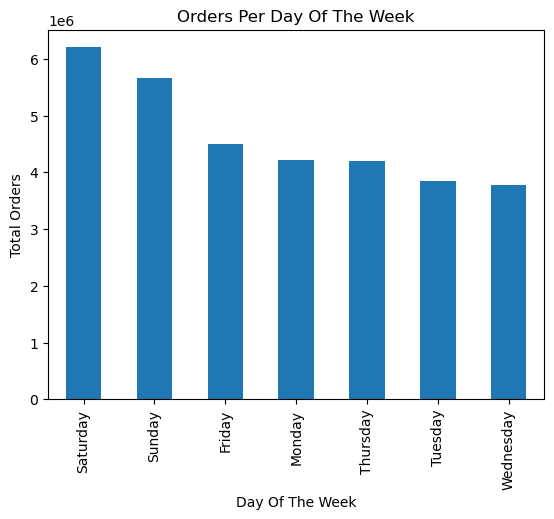

In [26]:
# Plotting a bar chart for 'orders_day_of_week'
bar_orders_day = df_complete['orders_day_of_week'].value_counts().plot.bar()

# Set title 
bar_orders_day.set_title('Orders Per Day Of The Week')

# Set axis labels
bar_orders_day.set_xlabel('Day Of The Week')
bar_orders_day.set_ylabel('Total Orders')

(0.0, 23.0)

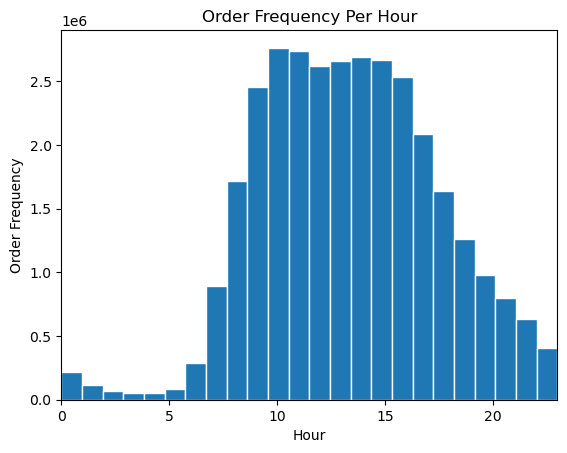

In [27]:
#creating a histogram for order_hour_of_day with 24 bins each bin represents an hour of the day
hist_order_hour_of_day = df_complete['order_hour_of_day'].plot.hist(bins = 24,edgecolor='white')

#set title 
hist_order_hour_of_day.set_title('Order Frequency Per Hour')

#set axis name
hist_order_hour_of_day.set_ylabel('Order Frequency')
hist_order_hour_of_day.set_xlabel('Hour')

#set x axis limit to 23
hist_order_hour_of_day.set_xlim(0, 23)

In [28]:
#exporting the histograms as images 

hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_4.10.png'))

bar_orders_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_4.10.png'))

Based on these two histograms, the busiest days are Saturdays and Sunday. The busiest hours are between 10 am and 4 pm.

## 2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [29]:
#reducing sample based on necessary columns 'orders' & 'avg_spend'
df_orders_avg_spend = df_complete[['order_hour_of_day', 'avg_spend']]

In [ ]:
#workaround NAN in the data

# Replace infinite values with NaN
df_complete.replace([np.inf, -np.inf], np.nan, inplace=True)

#creating a line chart
line_orders_avg_spend = sns.lineplot(data = df_orders_avg_spend, x = 'order_hour_of_day',y = 'avg_spend')

In [ ]:
#exporting the chart
line_orders_avg_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_avg_spend_4.10.png'))

The line chart shows that there is a peak on avg. money spend during late hours in the evening. Then early in the morning after 5 a.m and another peak around 5 p.m. probably after people finish working.

## 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts

In [31]:
#checking for descriptive data about the price column
pd.options.display.float_format = '{:,.2f}'.format

# Display the describe output
print(df_complete['prices'].describe())

count   32,399,732.00
mean             7.79
std              4.24
min              1.00
25%              4.20
50%              7.40
75%             11.30
max             25.00
Name: prices, dtype: float64


The table above shows the general statistical characteristics of the column prices for the marketing team to have the most high level information about the colummns price. The next step could be to show them the how many poducts per prices exist.

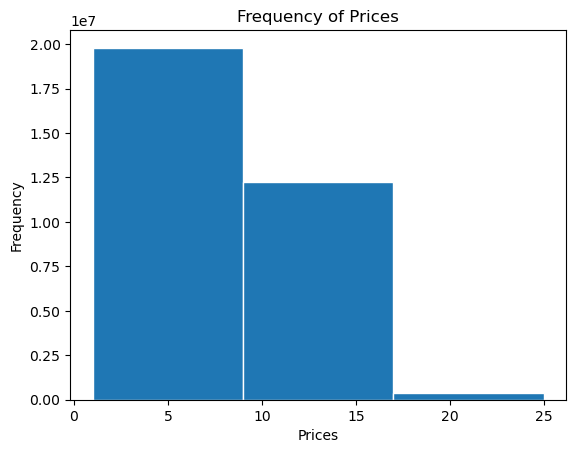

In [32]:
#creating a histogram for the price column (bar chart)
hist_prices = df_complete['prices'].plot.hist(bins = 3,edgecolor='white')

#set title 
hist_prices.set_title('Frequency of Prices')

#set x-axis title
hist_prices.set_xlabel('Prices')

# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_prices.png'))

    The histogram shows that most of the items sold are low-priced-items (between 1 and 9 ), the second biggest category is the mid-priced items (between 9 and 17) and the smallest category is the high-priced items (between 17 and 25).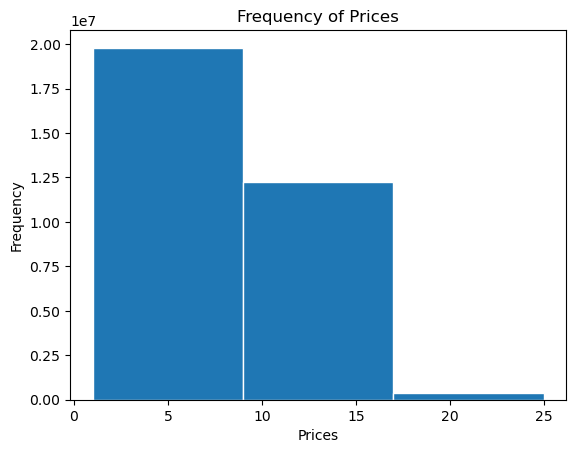

## 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [33]:
# counting the orders using the department column and arranging the data in a desc order
department_orders = df_complete['department'].value_counts().sort_values(ascending=True)

In [34]:
# Getting the department with the most orders
top_department = department_orders.idxmax()

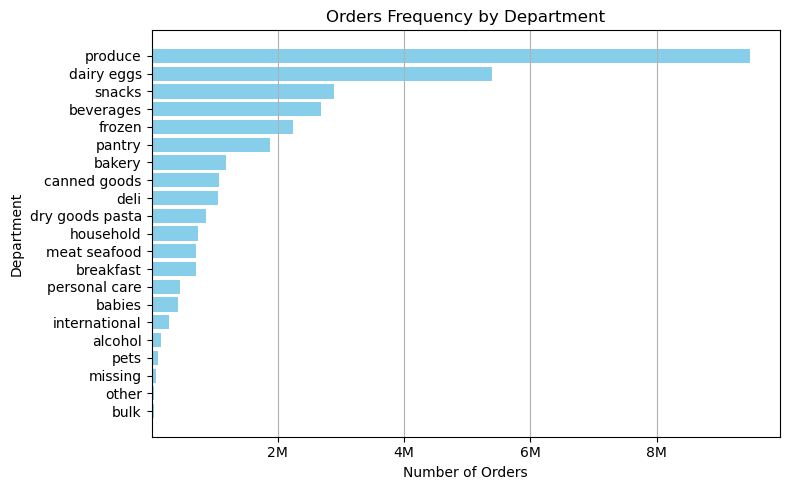

In [35]:
# Creating a horizontal bar chart for the number of orders per department
plt.figure(figsize=(8, 5))
plt.barh(department_orders.index, department_orders.values, color='skyblue')

#setting lables in the axis
plt.xlabel('Number of Orders')
plt.ylabel('Department')

#setting tittle 
plt.title('Orders Frequency by Department')

# Add gridlines only on x-axis for better readability
plt.grid(axis='x')

# Setting the  x-axis ticks to read Million
plt.xticks([2000000, 4000000, 6000000, 8000000], ['2M', '4M', '6M', '8M'])

# Saving the plot to a file as PNG
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_orders.png'))

The department with the highest number of orders is the produce department (over 8 million orders). Followed by dairy eggs with over 5 million orders. The third most popular department is the snacks department. 

# B. Answering the task 4.10

# 1. The Instacart officers are interested in comparing customer behavior in different geographic areas.

#### 1a. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customer's data set.

In [36]:
# Define the dictionary mapping states to regions
state_to_region = {
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'Arizona': 'West',
    'New Mexico': 'West',
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Hawaii': 'West'
}

# Create the 'Region' column based on the 'State' column using the mapping dictionary
df_complete['region'] = df_complete['state'].map(state_to_region)

In [37]:
#checking for output
df_complete.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,order_frequency,frequency_flag,state,age,date_joined,n_dependants,fam_status,income,merge_indicator_4.9,department,region
0,2539329,1,1,Monday,8,NaN,196,1,0,both,Soda,77,7,9.00,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South
1,2398795,1,2,Tuesday,7,15.00,196,1,1,both,Soda,77,7,9.00,both,Regularly busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South
2,473747,1,3,Tuesday,12,21.00,196,1,1,both,Soda,77,7,9.00,both,Regularly busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South
3,2254736,1,4,Wednesday,7,29.00,196,1,1,both,Soda,77,7,9.00,both,Least busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South
4,431534,1,5,Wednesday,15,28.00,196,1,1,both,Soda,77,7,9.00,both,Least busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South


#### 1b. Determine whether there’s a difference in spending habits between the different U.S. regions. 

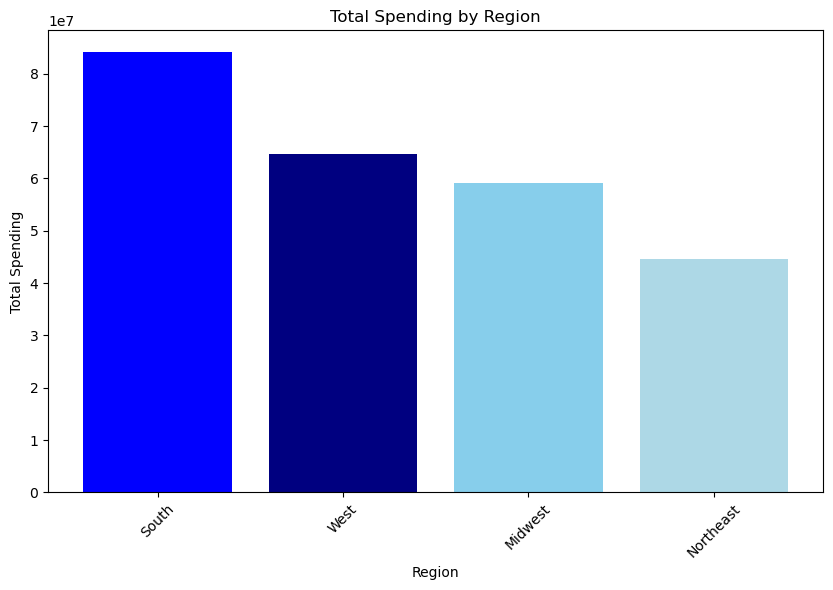

In [38]:
# Grouping the data by 'region' and sum up the spending based on the price of the orders for each region
spending_by_region = df_complete.groupby('region')['prices'].sum().sort_values(ascending=False)

# Setting colors
colors = ['blue', 'navy', 'skyblue', 'lightblue']

# Create a bar chart to visualize the total spending for each region
plt.figure(figsize=(10, 6))
plt.bar(spending_by_region.index, spending_by_region.values, color=colors)

# Setting the axis and title
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.title('Total Spending by Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  

# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_by_region_4.10.png'))

# Display the plot
plt.show()

The histogram above shows the regions, South, West, Midwest, Northeast in the x-achis. And the spending value based on the price of the orders in the y-achis. The South region spends the most with over 8 million dollars spent. Followed by the West region (above 6 million), the Midwest region (about 6 million) and the Northeast region with almost 5 million dollars. 

In [39]:
# totals unique user_ids by region
df_complete.groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)

,user_id
region,
South,68737
West,52565
Midwest,48519
Northeast,36388


The total amount of unique user_ids by region correlates with the total amount spent. The South region has the most unique user_ids (68737) and is the region with the highest spending recorded. Followed by the West (52565 unique_ids) , Miswest region (48519 unique user_ids) and finally the Northeast region with 36388 unique user_ids. 

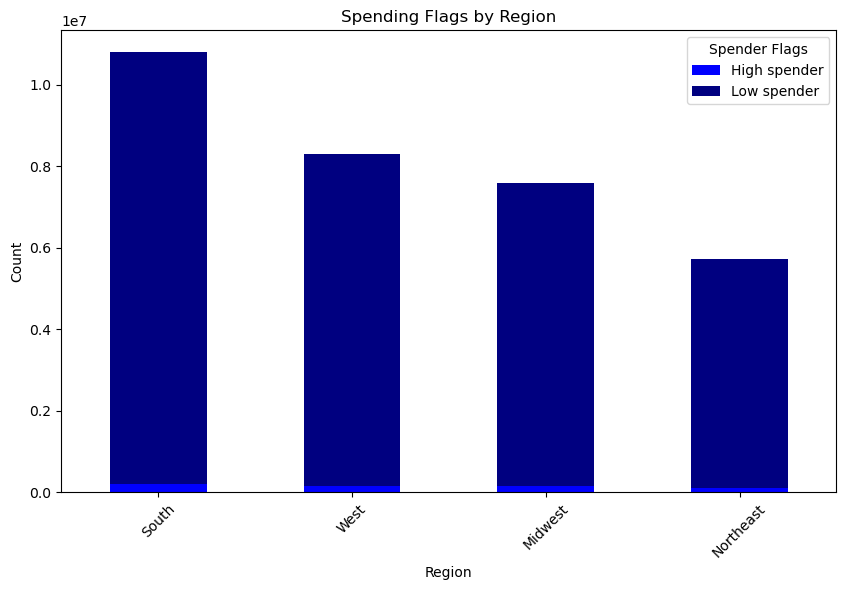

In [40]:
# Grouping the data by 'region' and counting the occurrence of each spending flag for each region
spending_flags_by_region = df_complete.groupby(['region', 'spender_flag']).size().unstack(fill_value=0)

# Summing up the counts across spending flags to get total count for each region
spending_flags_by_region['Total'] = spending_flags_by_region.sum(axis=1)

# Sorting the regions based on total count in ascending order
spending_flags_by_region_sorted = spending_flags_by_region.sort_values(by='Total', ascending=False)

# Create a bar chart to visualize the spending flags for each region
plt.figure(figsize=(10, 6))
spending_flags_by_region_sorted.drop(columns='Total').plot(kind='bar', stacked=True, ax=plt.gca(), 
                                                           color=['blue', 'navy', 'skyblue'])

# Setting the axis and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Spending Flags by Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend(title='Spender Flags')

# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_flags_by_region_4.10.png'))

plt.show()

By grouping the 'region' by 'spender_flag' we see the same result. The South has the highest amount of low and high spenders, followed by the West region, Midwest region and the last being the Northeast region. My hypothesis would be 'the higher the number of orders/clients(unique_ids) a region has, the higher the spending in that region'

# 2. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.

### 2a. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [41]:
#creating an exclusion flag for customers below 5 orders, low-activity customers
df_complete['below_5_orders'] = np.where(df_complete['order_frequency'] < 5, True, False)

In [42]:
#checking the output
df_complete.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,order_frequency,frequency_flag,state,age,date_joined,n_dependants,fam_status,income,merge_indicator_4.9,department,region,below_5_orders
0,2539329,1,1,Monday,8,NaN,196,1,0,both,Soda,77,7,9.00,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False
1,2398795,1,2,Tuesday,7,15.00,196,1,1,both,Soda,77,7,9.00,both,Regularly busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False
2,473747,1,3,Tuesday,12,21.00,196,1,1,both,Soda,77,7,9.00,both,Regularly busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False
3,2254736,1,4,Wednesday,7,29.00,196,1,1,both,Soda,77,7,9.00,both,Least busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False
4,431534,1,5,Wednesday,15,28.00,196,1,1,both,Soda,77,7,9.00,both,Least busy,Slowest busy,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False
5,3367565,1,6,Monday,7,19.00,196,1,1,both,Soda,77,7,9.00,both,Regularly busy,Regularly busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False
6,550135,1,7,Sunday,9,20.00,196,1,1,both,Soda,77,7,9.00,both,Regularly busy,Busiest days,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False
7,3108588,1,8,Sunday,14,14.00,196,2,1,both,Soda,77,7,9.00,both,Regularly busy,Busiest days,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False
8,2295261,1,9,Sunday,16,0.00,196,4,1,both,Soda,77,7,9.00,both,Regularly busy,Busiest days,"Most orders in hours: 9,10,11,12,13,14,15,16",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False
9,2550362,1,10,Wednesday,8,30.00,196,1,1,both,Soda,77,7,9.00,both,Least busy,Slowest busy,"Average orders in hours: 7,8,17,18,19,20,21,22",10,New customer,6.37,Low spender,20.50,Non-frequent customer,Alabama,31,2019-02-17,3,married,40423,both,beverages,South,False


In [43]:
# Filtering out low-activity customers
filtered_df = df_complete[df_complete['below_5_orders'] == False]

In [44]:
#checking for output to confirm that the min in column order_frequency is 5 
filtered_df['order_frequency'].describe()

count   27,811,924.00
mean            11.57
std              7.03
min              5.00
25%              7.00
50%              8.00
75%             14.00
max             30.00
Name: order_frequency, dtype: float64

### 2b. Make sure you export this sample.

In [45]:
# Exporting the filtered DataFrame as a sample
filtered_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'filtered_df_without_customer_below_5_orders.pkl'))

### 3. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### 3a. creating a new column for age profiling 

In [46]:
#investigating the 'age' to define the ranges of the categories for the new column
df_complete['age'].describe()

count   32,404,859.00
mean            49.47
std             18.49
min             18.00
25%             33.00
50%             49.00
75%             65.00
max             81.00
Name: age, dtype: float64

In [47]:
#Create the column 'age_profile' with the following categories: 
#(under 21 years <= 21 years, young adult = between 21 and 44, middle-aged = between 45 and 64 & senior = >= 65 years
df_complete.loc[df_complete['age'] <= 21, 'age_profile'] = 'under 21 years'
df_complete.loc[(df_complete['age'] >= 21) & (df_complete['age'] <= 44), 'age_profile'] = 'young adult'
df_complete.loc[(df_complete['age'] >= 45) & (df_complete['age'] <= 64), 'age_profile'] = 'middle-aged'
df_complete.loc[df_complete['age'] >= 65, 'age_profile'] = 'senior'

df_complete['age_profile'].value_counts(dropna = False)

age_profile
young adult       12167156
middle-aged       10139691
senior             8575084
under 21 years     1522928
Name: count, dtype: int64

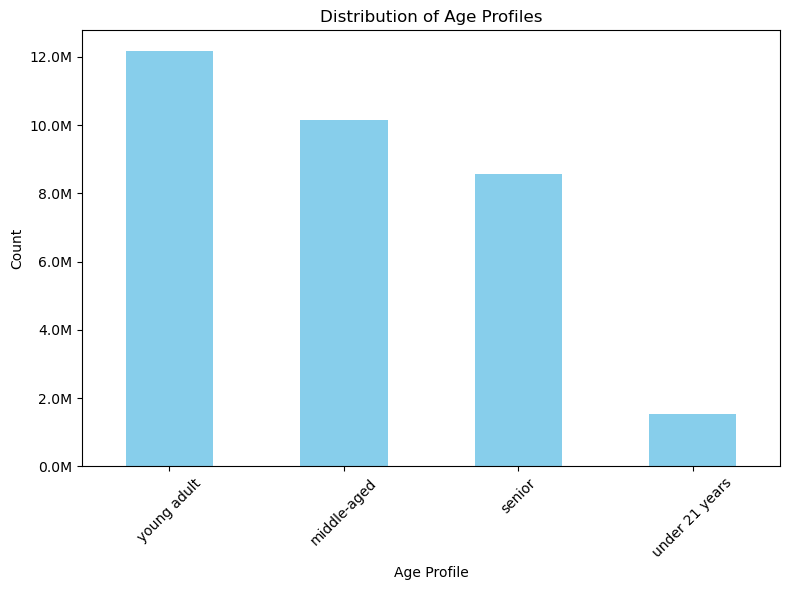

In [48]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Counting the occurrences of each age profile category
age_profile_counts = df_complete['age_profile'].value_counts(dropna=False)

# Creating a function to format y-axis labels in millions
def millions_formatter(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a bar chart
plt.figure(figsize=(8, 6))
age_profile_counts.plot(kind='bar', color='skyblue')

# Setting the axis and title
plt.xlabel('Age Profile')
plt.ylabel('Count')
plt.title('Distribution of Age Profiles')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Apply formatter to y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_counts_4.10.png'))

# Show the plot
plt.tight_layout()
plt.show()


Instacart main customer base is young adults with more than 12 million customers in that age group.

### 3b. creating a new column for income profiling 

In [49]:
#investigating the 'income' to define the ranges of the categories for the new column
df_complete['income'].describe()

count   32,404,859.00
mean        99,437.73
std         43,057.27
min         25,903.00
25%         67,004.00
50%         96,618.00
75%        127,912.00
max        593,901.00
Name: income, dtype: float64

In [50]:
#using the income quartiles as categories for the new columns 'income_profile'
df_complete.loc[df_complete['income'] < 67004, 'income_profile'] = 1
df_complete.loc[(df_complete['income'] >= 67004) & (df_complete['income'] <= 96618), 'income_profile'] = 2
df_complete.loc[(df_complete['income'] >= 96618) & (df_complete['income'] <= 127912), 'income_profile'] = 3
df_complete.loc[df_complete['income'] >= 127912, 'income_profile'] = 4

df_complete['income_profile'].value_counts(dropna=False)

income_profile
4.00    8101288
1.00    8101214
2.00    8101207
3.00    8101150
Name: count, dtype: int64

### 3c. crossing the age profiling with the department column 

In [51]:
#checking the department column count 
df_complete['department'].value_counts(dropna=False)

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [52]:
# Grouping by 'department' and 'age_profile', then aggregate the sum of prices
sum_prices_by_department_age_profile = df_complete.groupby(['department', 'age_profile'])['prices'].sum().reset_index()

# Sorting the result by 'department' and 'age_profile' in descending order
sum_prices_by_department_age_profile_sorted = sum_prices_by_department_age_profile.sort_values(by=['department', 'age_profile'], ascending=False)

In [53]:
#Setting the display option to show all rows
pd.set_option('display.max_rows', None)

In [54]:
#using crosstabs in Excel 
crosstab = pd.crosstab(index=sum_prices_by_department_age_profile['department'], 
                        columns=sum_prices_by_department_age_profile['age_profile'], 
                        values=sum_prices_by_department_age_profile['prices'], 
                        aggfunc='sum')

# Sorting the crosstab by 'department' and 'age_profile in descending order
crosstab_sorted = crosstab.sort_values(by=['department'], ascending=False)

In [55]:
crosstab_sorted

age_profile,middle-aged,senior,under 21 years,young adult
department,,,,
snacks,"3,872,242.50","3,250,660.50","572,487.00","4,650,148.00"
produce,"23,598,748.30","20,065,539.60","3,562,280.10","28,434,366.50"
pets,"231,951.30","208,341.00","41,335.80","289,260.30"
personal care,"1,137,775.00","940,410.90","170,984.30","1,329,959.70"
pantry,"4,712,782.20","3,976,776.00","705,985.60","5,625,117.00"
other,"80,716.00","65,428.50","13,182.10","94,381.40"
missing,"187,493.50","157,196.30","31,267.90","222,887.50"
meat seafood,"3,596,674.90","3,098,219.50","547,648.80","4,309,027.10"
international,"642,785.90","545,644.40","97,846.40","782,196.00"


In [56]:
#copy crosstab data and paste into excel
crosstab.to_clipboard()

<Figure size 1600x1000 with 0 Axes>

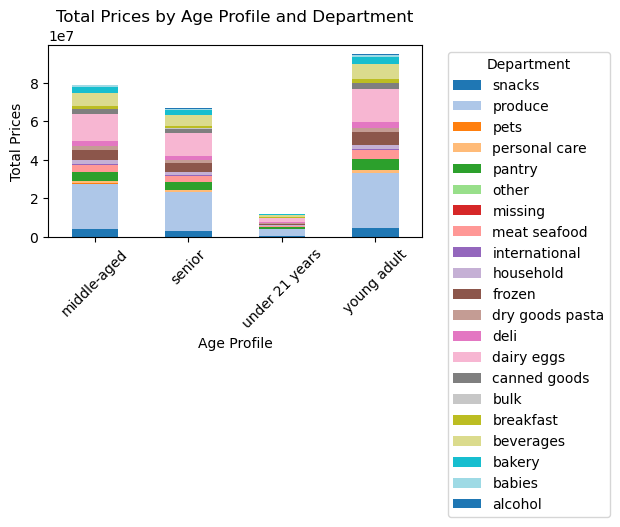

In [57]:
# Define a wider range of distinct colors for 21 departments
color_palette = sns.color_palette("tab20", 21)

# Increase the figure size
plt.figure(figsize=(16, 10))

# Transpose the crosstab to have 'Age Profile' as columns
crosstab_transposed = crosstab_sorted.T

# Plotting the transposed crosstab with the specified color palette
crosstab_transposed.plot(kind='bar', stacked=True, color=color_palette)

# Setting the axis and title
plt.xlabel('Age Profile')
plt.ylabel('Total Prices')
plt.title('Total Prices by Age Profile and Department')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_prices_by_age_and_department.png'))

# Show the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 

The stacked bar chart lets us see that regardless of the age profile, the 3 most popular categories are: produce, dairy eggs, and beverages. We also see that the distribution of all departments is similar in all age categories, all the colors have similar sizes across the age profiles.  

### 3d. crossing the region with the department column to compare the behavior of the customers by region

In [58]:
# Create the second crosstab
crosstab2 = pd.crosstab(index=df_complete['department'], 
                        columns=df_complete['region'], 
                        values=df_complete['prices'],  
                        aggfunc='sum')

# Sorting the second crosstab by 'department' in descending order
crosstab2_sorted = crosstab2.sort_values(by='department', ascending=False)

In [59]:
crosstab2_sorted

region,Midwest,Northeast,South,West
department,,,,
snacks,"2,880,185.00","2,198,128.70","4,091,583.90","3,175,640.40"
produce,"17,785,237.50","13,291,982.90","25,234,455.60","19,349,258.50"
pets,"174,773.90","147,759.20","245,313.20","203,042.10"
personal care,"846,452.40","630,156.00","1,201,408.30","901,113.20"
pantry,"3,541,151.80","2,634,747.40","4,987,105.50","3,857,656.10"
other,"60,509.20","45,388.10","83,463.30","64,347.40"
missing,"142,966.00","106,572.20","199,948.10","149,358.90"
meat seafood,"2,702,927.60","2,027,864.20","3,845,538.20","2,975,240.30"
international,"486,821.80","359,965.60","690,424.30","531,261.00"


In [60]:
#copy crosstab data and paste into excel
crosstab2.to_clipboard()

<Figure size 1600x1000 with 0 Axes>

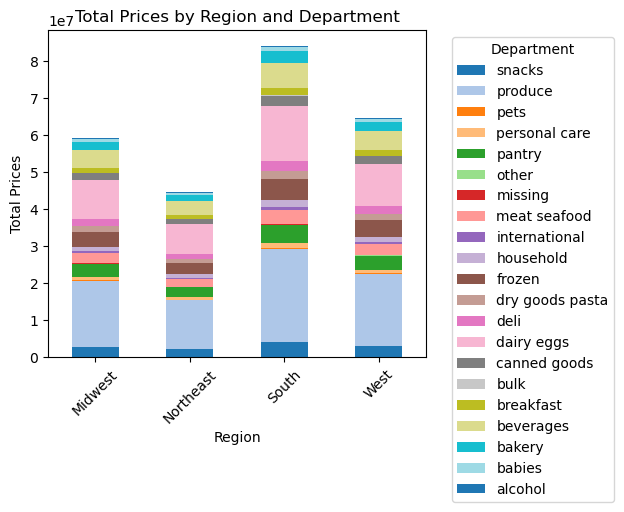

In [61]:
# Transpose the crosstab2_sorted DataFrame to have regions as rows and departments as columns
crosstab2_transposed = crosstab2_sorted.T

# Define a wider range of distinct colors for departments
color_palette = sns.color_palette("tab20", len(crosstab2_transposed.columns))

# Increase the figure size
plt.figure(figsize=(16, 10))

# Plotting the transposed crosstab2 as a stacked bar chart with the specified color palette
crosstab2_transposed.plot(kind='bar', stacked=True, color=color_palette)

# Setting the axis and title
plt.xlabel('Region')
plt.ylabel('Total Prices')
plt.title('Total Prices by Region and Department')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_prices_by_region_and_department.png'), dpi=300)

# Show the plot
plt.tight_layout()
plt.show()


We see a similar stacked bar chart as before, the 3 top departments are produce, dairy eggs, and beverages. The top 3 departments are popular across all ages and regions. 

In [62]:
# Grouping by 'region' and counting the occurrences of each age profile
age_profile_count_by_region = df_complete.groupby(['region', 'age_profile']).size().unstack(fill_value=0)

# Displaying the resulting DataFrame
print(age_profile_count_by_region)

age_profile  middle-aged   senior  under 21 years  young adult
region                                                        
Midwest          2392181  1990844          355128      2859172
Northeast        1778865  1553903          265567      2124401
South            3342092  2836257          516755      4096781
West             2626553  2194080          385478      3086802


### 3e. creating a profile for families with married status (since this is the largest portion of the customers) with small or big families depending on the number of dependents

In [63]:
#checking the fam_status column count 
df_complete['fam_status'].value_counts(dropna=False)

fam_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

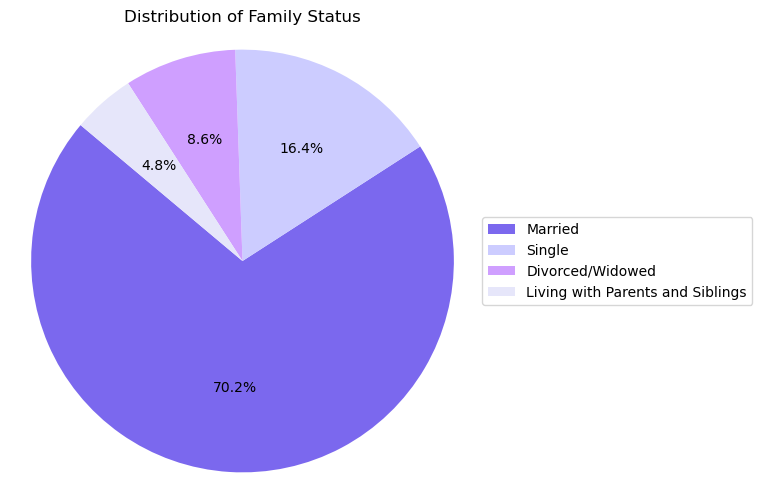

In [64]:
#creating a pie chart for the fam_status distribution
import matplotlib.pyplot as plt

# Categories and their counts
categories = ['Married', 'Single', 'Divorced/Widowed', 'Living with Parents and Siblings']
counts = [22756753, 5325691, 2771812, 1550603]

# Calculate total count
total_count = sum(counts)

# Calculate percentages
percentages = [(count / total_count) * 100 for count in counts]

# Define colors (four different tones of purple)
colors = ['#7B68EE', '#CCCCFF', '#CF9FFF', '#E6E6FA']

# Create a pie chart with different tones of purple
plt.figure(figsize=(6, 6))  # Adjust the size here
plt.pie(percentages, labels=['']*len(categories), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Family Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the legend on the side with category names only
plt.legend(categories, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_statis.png'), dpi=300)

# Show the plot
plt.show()

In [65]:
#checking the n_dependats column count 
df_complete['n_dependants'].value_counts(dropna=False)

n_dependants
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

In [66]:
# Filtering 'married' values from 'fam_status' column as a copy
married_df = df_complete[df_complete['fam_status'].values == 'married'].copy()

In [71]:
# Creating a new column 'family_size' to categorize the family size
married_df.loc[married_df['n_dependants'].isin([0, 1]), 'family_size'] = 'small_family'
married_df.loc[married_df['n_dependants'].isin([2, 3]), 'family_size'] = 'big_family'

In [68]:
#checking the family_size column count 
married_df['family_size'].value_counts(dropna=False)

family_size
big_family      15205849
small_family     7550904
Name: count, dtype: int64

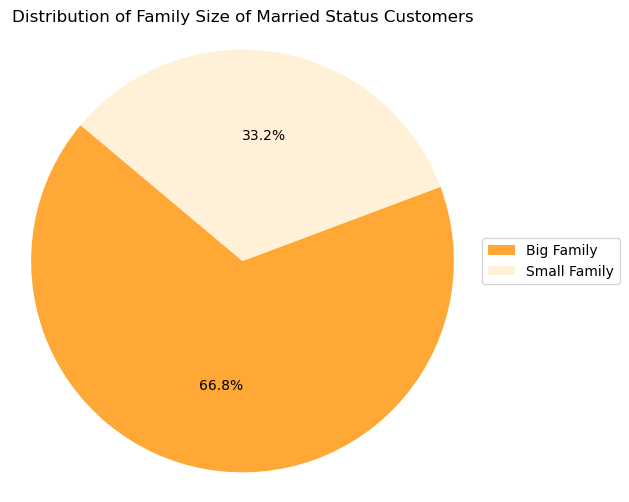

In [69]:
import matplotlib.pyplot as plt

# Categories and their counts
categories = ['Big Family', 'Small Family']
counts = [15205849, 7550904]

# Calculate total count
total_count = sum(counts)

# Calculate percentages
percentages = [(count / total_count) * 100 for count in counts]

# Define colors (two different tones of purple)
colors = ['#FFA836', '#FFF1D7']

# Create a pie chart with different tones of purple
plt.figure(figsize=(6, 6))  # Adjust the size here
patches, texts, _ = plt.pie(percentages, colors=colors, startangle=140, autopct='%1.1f%%')
plt.title('Distribution of Family Size of Married Status Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show only legend with category names
plt.legend(patches, categories, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_size.png'), dpi=300)

# Show the plot
plt.show()


In [70]:
# Group by 'family_size' and aggregate max, mean, and min for 'prices'
family_size_prices_stats = married_df.groupby('family_size')['prices'].agg(['max', 'mean', 'min']).reset_index()

# Rename columns for clarity
family_size_prices_stats.columns = ['family_size', 'max_price', 'mean_price', 'min_price']

# Display the resulting DataFrame
print(family_size_prices_stats)

    family_size  max_price  mean_price  min_price
0    big_family      25.00        7.79       1.00
1  small_family      25.00        7.80       1.00


In [72]:
# Group by 'family_size' and aggregate max, mean, and min for 'order_hour_of_day'
family_order_hour_of_day_stats = married_df.groupby('family_size')['order_hour_of_day'].agg(['max', 'mean', 'min']).reset_index()

# Rename columns for clarity
family_order_hour_of_day_stats.columns = ['family_size', 'max_order_hour_of_day', 'mean_order_hour_of_day', 'min_order_hour_of_day']

# Display the resulting DataFrame
print(family_order_hour_of_day_stats)

    family_size  max_order_hour_of_day  mean_order_hour_of_day  \
0    big_family                     23                   13.43   
1  small_family                     23                   13.40   

   min_order_hour_of_day  
0                      0  
1                      0  


When comparing the stats about the prices and when they order small and big families have the same behaviour. They pay on average 7.8 dollars and they order on average after mid-day around 13:40 hr. 

In [73]:
# Group by 'family_size' and 'department' and count the occurrences
department_counts_by_family_size = married_df.groupby(['family_size', 'department']).size().reset_index(name='count')

# Sort the counts in descending order within each family size group
department_counts_by_family_size['rank'] = department_counts_by_family_size.groupby('family_size')['count'].rank(ascending=False, method='first')

# Select the top 5 departments for each family size group
top_5_departments_by_family_size = department_counts_by_family_size[department_counts_by_family_size['rank'] <= 5]

# Sort the result by 'rank' column
top_5_departments_by_family_size_sorted = top_5_departments_by_family_size.sort_values(by=['family_size', 'rank'])

# Display the result
print(top_5_departments_by_family_size_sorted)


     family_size  department    count  rank
19    big_family     produce  4448641  1.00
7     big_family  dairy eggs  2525060  2.00
20    big_family      snacks  1357453  3.00
3     big_family   beverages  1263508  4.00
10    big_family      frozen  1051806  5.00
40  small_family     produce  2205577  1.00
28  small_family  dairy eggs  1263538  2.00
41  small_family      snacks   672136  3.00
24  small_family   beverages   625544  4.00
31  small_family      frozen   517244  5.00


We see that the number of dependants affects the number of times a family orders products from a department. Big families, married customers with 2 or 3 dependants order double as much of each product in the top 5 departments as small families

# 4. Exporting df_complete

In [74]:
df_complete.shape

(32404859, 36)

In [75]:
df_complete.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacard_report_4.10.pkl'))